In [1]:
!pip install pandas plotnine
!pip install plotly

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="ticks")
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
data = pd.read_csv('./Iris.csv')

In [4]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [10]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Title
- Iris-setosa -> 1
- Iris-versicolor -> 2
- Iris-virginica ->3

In [12]:
title_map = {'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}
data['Species'] = data['Species'].map(title_map)

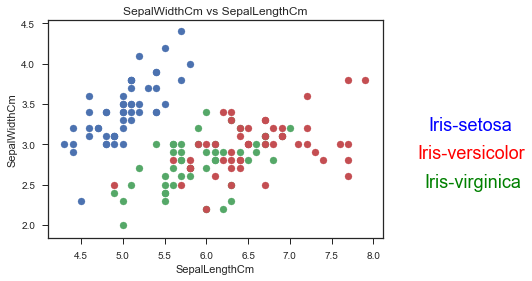

In [13]:
df1 = data[data['Species']==1]
df2 = data[data['Species']==2]
df3 = data[data['Species']==3]

plt.scatter(df1["SepalLengthCm"],df1['SepalWidthCm'])
plt.scatter(df2["SepalLengthCm"],df2['SepalWidthCm'])
plt.scatter(df3["SepalLengthCm"],df3['SepalWidthCm'])
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.title("SepalWidthCm vs SepalLengthCm")
plt.figtext(1.2, 0.5, 'Iris-setosa', horizontalalignment='right', fontsize=18,color='blue')
plt.figtext(1.23, 0.4, 'Iris-versicolor', horizontalalignment='right', fontsize=18,color='r')
plt.figtext(1.22, 0.3, 'Iris-virginica', horizontalalignment='right', fontsize=18,color='green')
plt.show()

### Modeling use KNN


In [14]:

# Importing Classifier Modules
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [15]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [16]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
target = data['Species']
train_data = data.drop(["Id","Species"],axis=1)
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[1.         1.         0.93333333 0.8        1.         1.
 1.         1.         0.93333333 1.        ]


In [17]:
clf.fit(train_data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

### Testing


In [18]:
clf.predict([[6, 3, 4, 2]])

array([2])

### Modeling use Decision Tree


In [19]:
iris_data = pd.read_csv("./Iris.csv");

In [20]:
iris_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:

# Importing Classifier Modules
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [22]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [23]:


train = iris_data.drop(['Id','Species'],axis=1)
target = iris_data['Species']


In [24]:
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [26]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[1.         1.         0.93333333 0.8        1.         1.
 0.93333333 0.93333333 0.93333333 0.93333333]


In [27]:
clf.fit(train, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
clf.predict([[6, 3, 4, 2]])

array(['Iris-virginica'], dtype=object)

## Modeling use Native Bayes


In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [30]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [31]:

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.93333333 1.         1.         0.8        0.93333333 1.
 1.         1.         0.93333333 0.93333333]


In [32]:
clf.fit(train, target)

GaussianNB(priors=None)

In [33]:
clf.predict([[6, 3, 4, 2]])

array(['Iris-virginica'], dtype='<U15')

### Modeling use Linear Regression

In [34]:
df = pd.read_csv("./data.csv")

In [35]:
df.ndim


2

In [36]:
X = df.iloc[:,0].values.reshape(-1,1)

In [37]:
X.ndim

2

In [38]:
Y=df.iloc[:,1].values.reshape(-1,1)

In [39]:
Y.ndim

2

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [41]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [42]:
clf = LinearRegression()

In [43]:
clf.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
Y_pre = clf.predict(X)

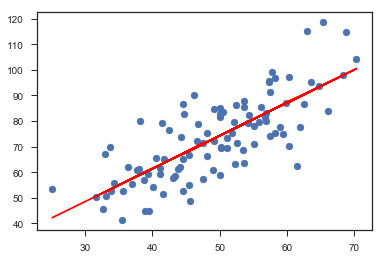

In [45]:
plt.scatter(X, Y)
plt.plot(X, Y_pre, color='red')
plt.show()

In [46]:
Y_df = pd.DataFrame({'Column1':Y[:,0]})

In [47]:
Y_pre_df = pd.DataFrame({'Column1':Y_pre[:,0]})

## Modeling using logical regression


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
clf = LogisticRegression()

In [50]:
clf.fit(train,target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
clf.predict([[6, 3, 4, 2]])

array(['Iris-virginica'], dtype=object)

## Modeling use SVM

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
clf = SVC(gamma='auto')
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scoring = 'accuracy'
score = cross_val_score(clf,train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
clf.fit(train, target) 

[1.         1.         0.93333333 0.93333333 1.         1.
 1.         1.         0.93333333 0.93333333]


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
clf.predict([[6,3,4,2]])

array(['Iris-versicolor'], dtype=object)